<a href="https://colab.research.google.com/github/blufury/Class-projects/blob/master/Boston_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# **Question 1**

In [ ]:
data = pd.read_csv('Boston.csv')

medv_mean = data['medv'].mean()
print(f'Mean of medv: {medv_mean:.2f}')
data['medv_cat'] = np.where(data['medv'] > medv_mean, 'High', 'Low')
print(data[['medv', 'medv_cat']].head(10))

Mean of medv: 22.53
   medv medv_cat
0  24.0     High
1  21.6      Low
2  34.7     High
3  33.4     High
4  36.2     High
5  28.7     High
6  22.9     High
7  27.1     High
8  16.5      Low
9  18.9      Low


# **Question 2**

In [ ]:
numerical_summary = data.describe()
print(numerical_summary)

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

Text(0.5, 0, 'Median Value (in $1000s)')

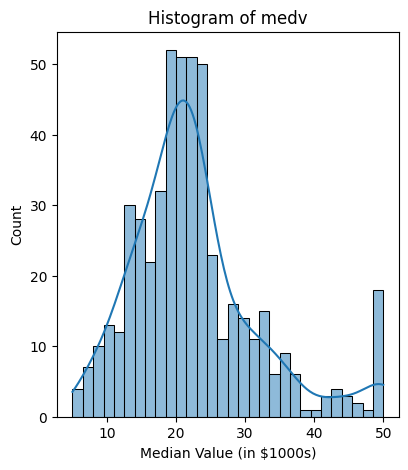

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data['medv'], bins=30, kde=True)
plt.title('Histogram of medv')
plt.xlabel('Median Value (in $1000s)')

Text(0, 0.5, 'Lower Status Pop %')

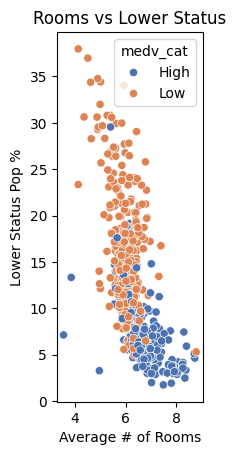

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot (data=data, x='rm', y='lstat', hue='medv_cat', palette='deep')
plt.title('Rooms vs Lower Status')
plt.xlabel('Average # of Rooms')
plt.ylabel('Lower Status Pop %')

As the summaries show, there is a strong correlation in an increase of rooms meaning a higher status (or income) of the family. While there are some outliers from both sides, it appears to follow the common knowledge of 'more square feet = higher cost' for house costs.

# **Question 3**

In [ ]:
medvResp = data.drop(columns=['medv', 'medv_cat'])
resp = data['medv_cat']
trainA, testA, trainB, testB = train_test_split(medvResp, resp, test_size=0.2, random_state=42)

print('Training predictors')
print(trainA.head())

print('\nTraining responses')
print(trainB.head())

Training predictors
     Unnamed: 0      crim    zn  indus  chas     nox     rm   age     dis  \
477         478  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   
15           16   0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986   
332         333   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407   
423         424   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   
19           20   0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965   

     rad  tax  ptratio  lstat  
477   24  666     20.2  24.91  
15     4  307     21.0   8.47  
332    1  304     16.9   7.83  
423   24  666     20.2  23.29  
19     4  307     21.0  11.28  

Training responses
477    Low
15     Low
332    Low
423    Low
19     Low
Name: medv_cat, dtype: object


# **Question 4**

In [ ]:
scaler = StandardScaler()
trainAScaled = scaler.fit_transform(trainA)
testAScaled = scaler.transform(testA)

trainAConst = sm.add_constant(trainAScaled)
testAConst = sm.add_constant(testAScaled)

trainBBinary = trainB.map({'Low': 0, 'High': 1})
logitModel = sm.Logit(trainBBinary, trainAConst)
logitResult = logitModel.fit()

print(logitResult.summary())

Optimization terminated successfully.
         Current function value: 0.304184
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               medv_cat   No. Observations:                  404
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                           13
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.5540
Time:                        01:18:50   Log-Likelihood:                -122.89
converged:                       True   LL-Null:                       -275.56
Covariance Type:            nonrobust   LLR p-value:                 1.836e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7529      0.209     -3.597      0.000      -1.163      -0.343
x1            -0.1210      0.

There are several predictors that influence the prices of the homes. Pollution (nox) and proximity to the river (chas) have moderate coefficients. Implying lower pollution and having a river front view possitivly impact the price of a home. With stronger coefficients of number of rooms (rm) and percentage of lower-status population. More rooms (more sqft) and less poor people increase the value of the home (go figure).

# **Question 5**

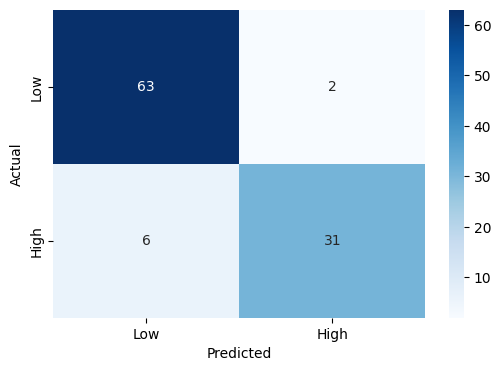

Model Accuracy:  0.9215686274509803


In [ ]:
logitPredict = logitResult.predict(testAConst)
logitPredictClass = np.where(logitPredict > 0.5, 'High', 'Low')
matrix = confusion_matrix(testB, logitPredictClass, labels=['Low', 'High'])
accuracy = accuracy_score(testB, logitPredictClass)

plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Model Accuracy: ', accuracy)


The matrix shows few false positives, showing a conservative predictions by the model. Likely a home bordering the cutoff, ie a big house in a high pollution area. The false negatives shows an underprediction, likely from the outliers in the data set. Such as a mansion far from the river unlike its fellow mansions.

# **Question 6**

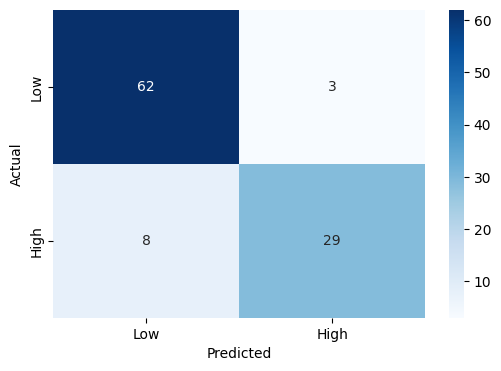

0.8921568627450981


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(trainAScaled, trainB)
ldaPredict = lda.predict(testAScaled)
ldaMatrix = confusion_matrix(testB, ldaPredict, labels=['Low', 'High'])
ldaAcc = accuracy_score(testB, ldaPredict)

plt.figure(figsize=(6,4))
sns.heatmap(ldaMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(ldaAcc)

# **Question 7**

0.8333333333333334


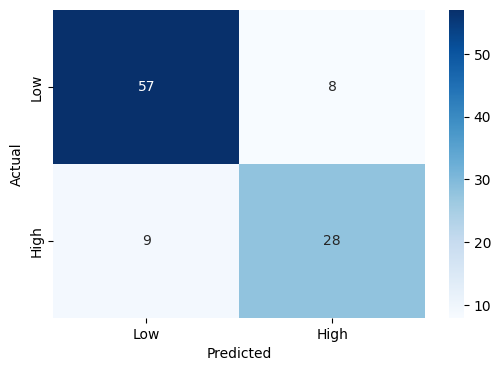

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainAScaled, trainB)
knnPredict = knn.predict(testAScaled)
knnMatrix = confusion_matrix(testB, knnPredict, labels=['Low', 'High'])
knnAcc = accuracy_score(testB, knnPredict)

plt.figure(figsize=(6,4))
sns.heatmap(knnMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show
print(knnAcc)

# **Question 8**

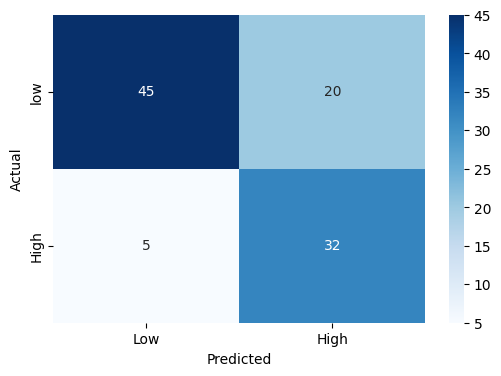

0.7549019607843137


In [ ]:
gnb = GaussianNB()
gnb.fit(trainAScaled, trainB)
gnbPredict = gnb.predict(testAScaled)
gnbMatrix = confusion_matrix(testB, gnbPredict, labels=['Low', 'High'])
gnbAcc = accuracy_score(testB, gnbPredict)

plt.figure(figsize=(6,4))
sns.heatmap(gnbMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['low', 'High'])
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.show()
print(gnbAcc)

# **Question 9**

If having to choose between the 4 models used (LRM, LDA, KNN, GNB), the LRM would be the go-to. It had the highest accuracy at 92%. LDA came close at 89%, with KNN and GNB lagging far behind in accuracy. GNB in particular, struggled with the labels the most. It had a 75% accuracy, a significant drop compared to LRM.

# **Question 10**

The models reflect what is shown in real estate literature. One paper mentions [unhealthy days having a significant economic impact](https://www.uakron.edu/economics/docs/academics/senior-projects/emilyreeseseniorprojectspring2024.pdf), but little impact of healthy days. This is could be attributed to the expectation of clean air. With smog/pollution being the abnormal and giving stronger feelings than a normal day. Another source calculates a whopping [15% increase in home value](https://orchard.com/blog/posts/how-much-value-does-an-extra-bedroom-add) per additional room. While it appears to be referring to post construction ROI ideas, the idea likely remains the same. With some anecdotal experience confirming that despite being the same size, or even sometimes smaller, higher priced homes 'block out' the lower population. Creating an effect that keeps prices high in the bubble of more affluent communities and creating a sort of status symbol amongst the population (leawood/overland park). Which further increases value despite offering little more than exterior curb appeal.